# Name: V. Sree Sai Bhavesh
# RegNo: 20BCE0348
# Slot: L19+L20

# Q1. Implement Random forest Trees algorithm and test the algorithm using any data set of your choice. The output should include Accuracy, Error rate, Precision and recall rate along with the confusion matrix.
 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('car_evaluation.csv')

In [3]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


# EDA - Summarization

In [4]:
data.shape

(1727, 7)

In [5]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


data.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
data.info

<bound method DataFrame.info of      buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    med  unacc
1     vhigh  vhigh      2       2    small   high  unacc
2     vhigh  vhigh      2       2      med    low  unacc
3     vhigh  vhigh      2       2      med    med  unacc
4     vhigh  vhigh      2       2      med   high  unacc
...     ...    ...    ...     ...      ...    ...    ...
1722    low    low  5more    more      med    med   good
1723    low    low  5more    more      med   high  vgood
1724    low    low  5more    more      big    low  unacc
1725    low    low  5more    more      big    med   good
1726    low    low  5more    more      big   high  vgood

[1727 rows x 7 columns]>

In [9]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(data[col].value_counts()) 

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [11]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
X = data.drop(['class'], axis=1)
y = data['class']

# Splitting training and testing dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [18]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


In [20]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


In [19]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [20]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

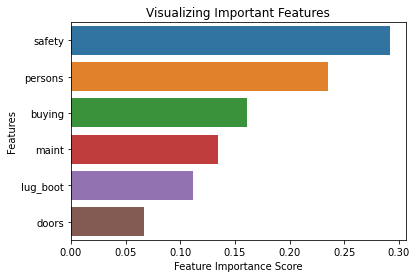

In [21]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[119   2   5   1]
 [  1  13   2   2]
 [  2   0 397   0]
 [  5   0   0  21]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.94      0.94       127
        good       0.87      0.72      0.79        18
       unacc       0.98      0.99      0.99       399
       vgood       0.88      0.81      0.84        26

    accuracy                           0.96       570
   macro avg       0.92      0.87      0.89       570
weighted avg       0.96      0.96      0.96       570



In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy Score is : ", accuracy_score(y_test,y_pred))

Accuracy Score is :  0.9649122807017544


In [29]:
print("Recall Score is: ", recall_score(y_test,y_pred,pos_label='positive',average='micro'))

Recall Score is:  0.9649122807017544


In [31]:
print("Precision Score is :", precision_score(y_test,y_pred,average='micro'))

Precision Score is : 0.9649122807017544


In [32]:
print("Error rate is: ", 1-accuracy_score(y_test,y_pred))

Error rate is:  0.03508771929824561
